# Hot Hand Final Project

## Data Exploration

** Chip, Toni, Tommy, Kyle ** 11/4/16

In [2]:
## Load necessary libraries
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.cross_validation import KFold
import StringIO
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Read in data
shot_logs_full = pd.read_csv('datasets/shot_logs.csv')
shot_logs_full.columns = map(str.lower, shot_logs_full.columns)

# Preview data
print 'Number of variables:', np.shape(shot_logs_full)[1]
print 'Variable names:', shot_logs_full.columns.values
print 'Number of observations/shots:', np.shape(shot_logs_full)[0]
shot_logs_full.head()

Number of variables: 21
Variable names: ['game_id' 'matchup' 'location' 'w' 'final_margin' 'shot_number' 'period'
 'game_clock' 'shot_clock' 'dribbles' 'touch_time' 'shot_dist' 'pts_type'
 'shot_result' 'closest_defender' 'closest_defender_player_id'
 'close_def_dist' 'fgm' 'pts' 'player_name' 'player_id']
Number of observations/shots: 128069


,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,...,shot_dist,pts_type,shot_result,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [4]:
#create column names
columns = ['std']
columns2 = ['shots']
columns3 = ['score']

#create dataframes to fill
index = shot_logs_full.player_name.unique()
d = pd.DataFrame(index=index, columns=columns)
d2 = pd.DataFrame(index=index, columns=columns2)
print d

                        std
brian roberts           NaN
bismack biyombo         NaN
al jefferson            NaN
cody zeller             NaN
gary neal               NaN
gerald henderson        NaN
kemba walker            NaN
michael kidd-gilchrist  NaN
lance stephenson        NaN
marvin williams         NaN
jason maxiell           NaN
gordon hayward          NaN
trevor booker           NaN
enes kanter             NaN
derrick favors          NaN
dante exum              NaN
jon ingles              NaN
trey burke              NaN
rudy gobert             NaN
carlos boozer           NaN
jeremy lin              NaN
kobe bryant             NaN
ed davis                NaN
ronnie price            NaN
wayne ellington         NaN
wesley johnson          NaN
jordan hill             NaN
nick young              NaN
robert sacre            NaN
harrison barnes         NaN
...                     ...
tony snell              NaN
aaron brooks            NaN
joakim noah             NaN
cj mccollum         

In [5]:
#get standard deviation of shot distance for each player
for i in shot_logs_full.player_name.unique():
    
    df = shot_logs_full[(shot_logs_full.player_name==i)]
    std = df['shot_dist'].std()

    d.set_value(i, 'std', std)
    
print d

                            std
brian roberts           7.19422
bismack biyombo         3.29198
al jefferson            5.01214
cody zeller             8.24195
gary neal                7.2959
gerald henderson        6.97169
kemba walker            8.96419
michael kidd-gilchrist  6.66128
lance stephenson        8.30315
marvin williams         8.03174
jason maxiell           5.19477
gordon hayward          8.77554
trevor booker           8.57174
enes kanter             7.67655
derrick favors          5.63802
dante exum              8.31031
jon ingles              8.31962
trey burke              8.65664
rudy gobert             2.81747
carlos boozer           5.99205
jeremy lin              8.92458
kobe bryant             7.88331
ed davis                 2.7715
ronnie price            8.93525
wayne ellington         7.77764
wesley johnson           7.4271
jordan hill             7.48279
nick young              7.52439
robert sacre            5.49441
harrison barnes          8.9454
...     

In [6]:
#get average number of shots per game for each player
for i in shot_logs_full.player_name.unique():
    
    df = shot_logs_full[(shot_logs_full.player_name==i)]
    gamesunique = df.game_id.unique()
    games = len(gamesunique)
    #only use players who have played in at least 35 games
    if games < 35:
        shotspg = 0
    else:
        shotspg = (float(df.shape[0])/float(games))

    d2.set_value(i, 'shots', shotspg)
    
print d2['shots']



brian roberts             6.30508
bismack biyombo                 0
al jefferson                   16
cody zeller               6.12069
gary neal                 9.36735
gerald henderson          9.87719
kemba walker              16.5476
michael kidd-gilchrist     8.5814
lance stephenson          9.68889
marvin williams           5.78182
jason maxiell             3.39474
gordon hayward              14.45
trevor booker             5.73684
enes kanter               11.6182
derrick favors            12.0893
dante exum                   4.75
jon ingles                4.07407
trey burke                13.2712
rudy gobert               4.60345
carlos boozer             10.6897
jeremy lin                8.72881
kobe bryant               20.3714
ed davis                   5.9322
ronnie price              5.18605
wayne ellington           8.58824
wesley johnson            8.42857
jordan hill               11.1636
nick young                11.2619
robert sacre               4.7451
harrison barne

In [7]:
d['shots'] = pd.Series(d2['shots'], index=index)

from sklearn import preprocessing

#scale the values
x = d.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, index = index)

print df_scaled


                               0         1
brian roberts           0.638911  0.299313
bismack biyombo         0.212044  0.000000
al jefferson            0.400213  0.759546
cody zeller             0.753523  0.290559
gary neal               0.650034  0.444683
gerald henderson        0.614569  0.468886
kemba walker            0.832529  0.785542
michael kidd-gilchrist  0.580613  0.407373
lance stephenson        0.760218  0.459947
marvin williams         0.730528  0.274472
jason maxiell           0.420191  0.161154
gordon hayward          0.811893  0.685965
trevor booker           0.789598  0.272337
enes kanter             0.691674  0.551534
derrick favors          0.468678  0.573898
dante exum              0.761001  0.225490
jon ingles              0.762019  0.193403
trey burke              0.798886  0.630005
rudy gobert             0.160137  0.218533
carlos boozer           0.507406  0.507455
jeremy lin              0.828196  0.414371
kobe bryant             0.714291  0.967065
ed davis   

C:\Users\Toni\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
index = shot_logs_full.player_name.unique()
df_score = pd.DataFrame(index=index, columns=columns3)

#calculate score for each player by adding the two columns together.
for index, row in df_scaled.iterrows():
    score = row.iloc[0] + row.iloc[1]
    df_score.set_value(index, 'score', score)


#sort by score
df_score = df_score.sort_values('score', ascending = False)

print df_score

                      score
lebron james        1.79026
damian lillard      1.74474
russell westbrook    1.7434
james harden        1.73004
carmelo anthony     1.71451
kobe bryant         1.68136
stephen curry       1.65685
derrick rose        1.64278
kyrie irving        1.63191
kemba walker        1.61807
lamarcus aldridge   1.58583
tyreke evans        1.58339
klay thompson       1.57985
blake griffin       1.56373
mnta ellis          1.56145
kyle lowry          1.54941
victor oladipo      1.52597
brandon knight       1.5197
ryan anderson       1.51841
jimmy butler        1.51269
eric bledsoe        1.49882
gordon hayward      1.49786
wilson chandler     1.48485
demarcus cousins    1.48284
kevin love          1.47715
rudy gay            1.46864
jared sullinger     1.46792
brandon jennings    1.46122
chandler parsons     1.4584
mike conley         1.45184
...                     ...
aron baynes        0.711458
alan crabbe        0.700674
jj hickson          0.69851
jonas valanciunas  0

14343
Number of unique player-game combinations where the player took a shot: 14343
Mean number of shots per game per player (given they have taken one): 8.92902461131


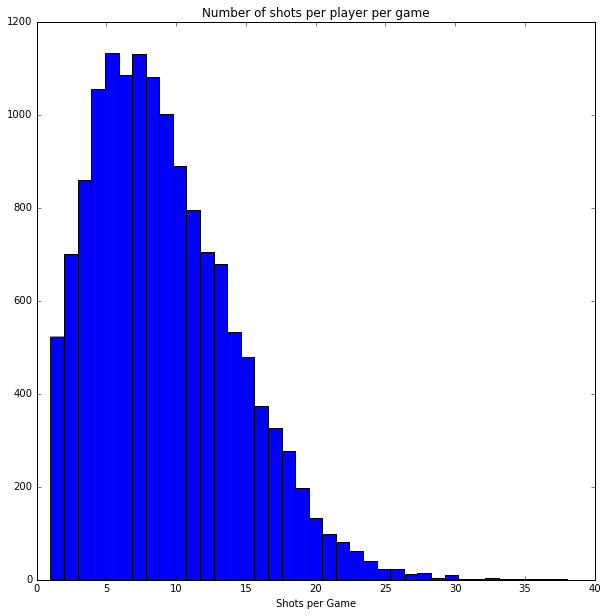

In [9]:
## Determine players with min number of shots taken per game to be included in analysis

# Group observations by unique values of player_id and game_id
gp = shot_logs_full.groupby(['player_id', 'game_id'])

# Create array that has shots per game for each unique value of player_id and game_id 
# (computationally expensive/inefficient, lmk if you have other ideas)
shots_per_game_per_player = []
for g in gp.groups.items():
    shots_per_game_per_player.append(np.shape(shot_logs_full.loc[g[1]])[0])

print len(shots_per_game_per_player)
    
print 'Number of unique player-game combinations where the player took a shot:', len(shots_per_game_per_player)
print 'Mean number of shots per game per player (given they have taken one):', np.mean(shots_per_game_per_player)

# Histogram of number of shots per player per game
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.hist(shots_per_game_per_player, bins = 38)
ax1.set_title('Number of shots per player per game')
plt.xlabel('Shots per Game')
plt.show()

** Comment: **
Given the above information, I would drop all players with less than **5** (maybe 4) shots per game. This is substantially below the mean (above) and the median (8). Intuitively, this seems legit, i.e., I think we can consider the prior belief that it is incredibly unlikely for players who have taken 4 or less shots to have the hot hand. Open to other interpretation though!

In [10]:
## Create new dataframe with only player-game combos where each player had more than 4 shots taken

# Create holding array
df_list = []

# Create array that has shots per game for each unique value of player_id and game_id 
# (again, computationally expensive/inefficient, lmk if you have other ideas)
for g in gp.groups.items():
    if (np.shape(shot_logs_full.loc[g[1]])[0] > 4):
        df_list.append(shot_logs_full.loc[g[1]])
        
# Concatenate df's that meet 5+ shot criteria
shot_logs_reduced = pd.concat(df_list)

In [22]:
# Preview reduced logs
print 'Number of observations/shots:', np.shape(shot_logs_reduced)[0]
shot_logs_reduced.head()

Number of observations/shots: 119341


,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,...,shot_dist,pts_type,shot_result,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id
28621,21400054,"NOV 04, 2014 - NOP vs. CHA",H,W,9,1,1,2:29,22.1,0,...,26.2,3,made,"Roberts, Brian",203148,4.4,1,3,ryan anderson,201583
28622,21400054,"NOV 04, 2014 - NOP vs. CHA",H,W,9,2,2,11:19,5.8,2,...,18.2,2,made,"Zeller, Cody",203469,6.1,1,2,ryan anderson,201583
28623,21400054,"NOV 04, 2014 - NOP vs. CHA",H,W,9,3,2,10:51,10.2,2,...,20.4,2,missed,"Maxiell, Jason",101131,5.7,0,0,ryan anderson,201583
28624,21400054,"NOV 04, 2014 - NOP vs. CHA",H,W,9,4,2,8:21,24.0,0,...,2.5,2,made,"Zeller, Cody",203469,2.6,1,2,ryan anderson,201583
28625,21400054,"NOV 04, 2014 - NOP vs. CHA",H,W,9,5,2,7:59,16.0,0,...,26.0,3,missed,"Zeller, Cody",203469,6.5,0,0,ryan anderson,201583


Mean Field Goal Percentage: 0.455301601942


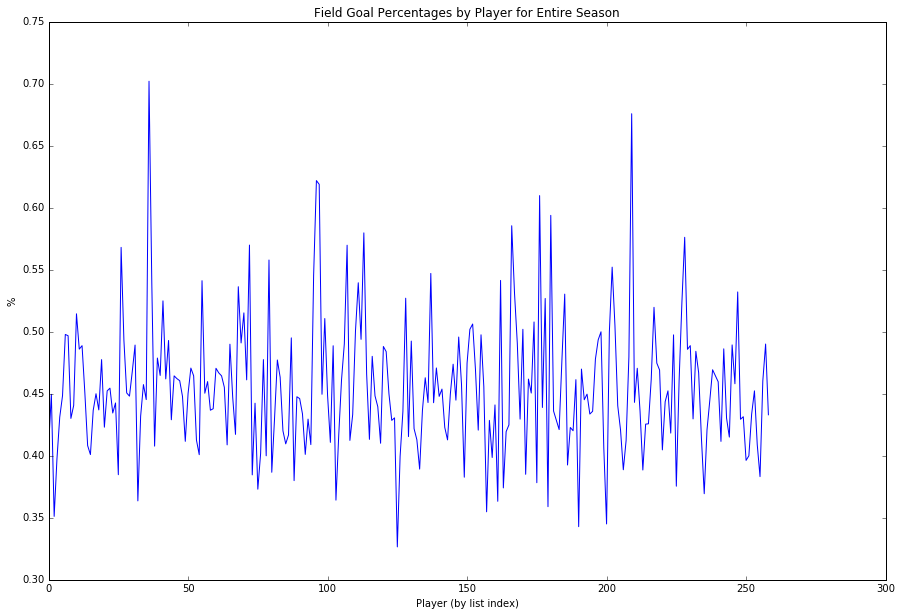

In [11]:
# Toni's work 

## Goal: Calculate field goal percentage for each player and determine top 5 shooters based on FG%

# for each player_id, count total number of shots and total number of field goals made (column name 'fgm')

# first get the player_ids
players = shot_logs_reduced['player_id'].unique()

# remove all players who haven't played at least 15 games in order to reduce sample size effects (15 is a little arbitrary, can be adjusted if needed)
for player in players:
    # dataset specific to given player
    player_df = shot_logs_reduced[shot_logs_reduced['player_id'] == player]
    if len(player_df['game_id'].unique()) < 15:
        shot_logs_reduced = shot_logs_reduced[shot_logs_reduced['player_id'] != player]
        
# create list to store fg%
fg_percentages = []
player_ids_in_fg_percent_order = []

# now get total shots and total made (if you get a 'float division by zero' error, just run this cell again)
players = shot_logs_reduced['player_id'].unique()
for player in players:
    # get data specific to the given player
    player_data = shot_logs_reduced[shot_logs_reduced['player_id'] == player]
    total_shots = player_data.shape[0]
    total_made = player_data[player_data['fgm'] == 1].shape[0]
    
    # calculate field goal %
    fg_percent = float(total_made) / total_shots
    fg_percentages.append(fg_percent)
    player_ids_in_fg_percent_order.append(player)

# get mean fg%
fg_percentages = np.array(fg_percentages)
print "Mean Field Goal Percentage: {0}".format(fg_percentages.mean())

# plot field goal % for each player to see general numbers for all selected players
# x-axis will just be the index of the player in the players list; we can map it back to specific id later
plt.figure(figsize=(15, 10))
plt.plot(range(len(players)), fg_percentages)
plt.title('Field Goal Percentages by Player for Entire Season')
plt.ylabel('%')
plt.xlabel('Player (by list index)')

In [12]:
# create a fg% column in the dataset for each player
# first create an array that will have the fg% in order
fg_percents_in_column_order = []

# go row by row in the dataset to find player_id in order
for index in range(shot_logs_reduced.shape[0]):
    row = shot_logs_reduced.iloc[index]
    row_id = row['player_id']
    # match row's player_id to a fg_percent
    for i in range(len(fg_percentages)):
        player_id = player_ids_in_fg_percent_order[i]
        fg_percent = fg_percentages[i]
        if row_id == player_id:
            # add that fg% in proper order
            fg_percents_in_column_order.append(fg_percent)

shot_logs_reduced['fg_percent'] = fg_percents_in_column_order

**Comment:** This graph shows us deviations of the field goal percentage made by each player. It shows us how much variation there may be in our data. Not sure how useful this will be in the future, but for now it will help us identify the top 5 shooters by field goal percentage. We can then examine more specific data with just the top 5 shooters.

In [13]:
# get top 5 shooting percentages 
# (argsort will return a list of the indices that would result in a sorted order)
fg_percentages_sorted = np.argsort(fg_percentages)
# get 5 max coefficients
max_index = len(fg_percentages_sorted)
max_percentages_indices = fg_percentages_sorted[(max_index - 5):max_index]

# then associate these indices with the players and fg%
top_5_players = players[max_percentages_indices]
top_5_fg_percents = fg_percentages[max_percentages_indices]

## create dataframe for just the top 5 players

# first create temp holding array
df_list = []
for player in top_5_players:
    df_list.append(shot_logs_reduced[shot_logs_reduced['player_id'] == player])
# then create full df
top_5_df = pd.concat(df_list)

print "Top 5 Players by Field Goal Percentage: {0}".format(top_5_df['player_name'].unique())

Top 5 Players by Field Goal Percentage: ['ed davis' 'mason plumlee' 'james johnson' 'tyson chandler'
 'deandre jordan']


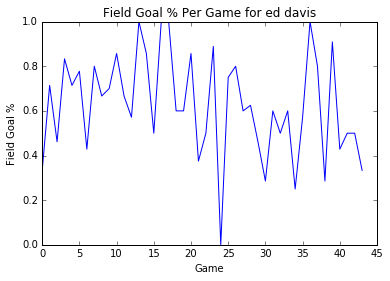

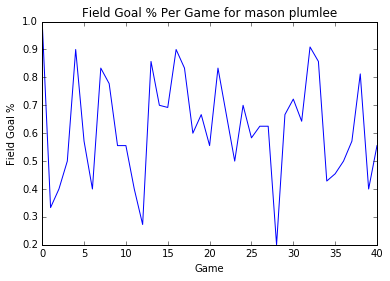

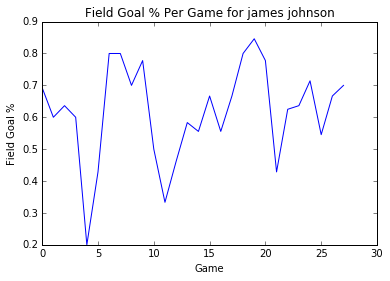

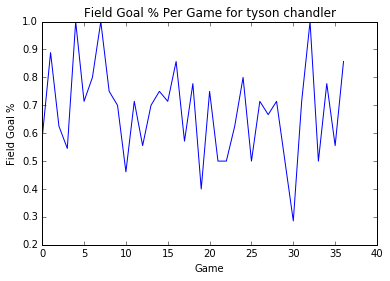

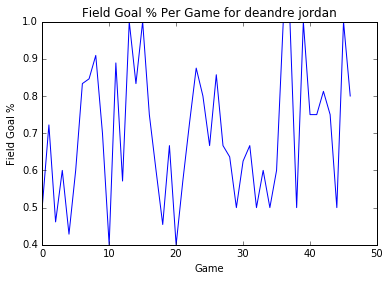

In [52]:
# now for each of the top 5 players, let's calculate and plot fg% for each game in the full season
for player in top_5_players:
    # create list to store field goal % for each game
    fg_percent_per_game = []
    # calculate fg% for each game
    player_df = top_5_df[top_5_df['player_id'] == player]
    for game in player_df['game_id'].unique():
        # get data specific to the given game
        game_data = top_5_df[top_5_df['game_id'] == game]
        total_shots = game_data.shape[0]
        total_made = game_data[game_data['fgm'] == 1].shape[0]
        
        # calculate fg% and append to list
        fg_percent = float(total_made) / total_shots
        fg_percent_per_game.append(fg_percent)
    
    # get player name
    player_name = top_5_df[top_5_df['player_id'] == player]['player_name'].unique()
    # now plot across the full season
    plt.figure()
    plt.plot(range(len(fg_percent_per_game)), fg_percent_per_game)
    plt.title('Field Goal % Per Game for ' + player_name[0])
    plt.xlabel('Game')
    plt.ylabel('Field Goal %')
        

**Comment:** This field goal % per game metric allows us to see how well the top 5 players are shooting across the season. It could be useful information if we're looking at Hot Hand Theory at a macroscopic level (i.e. getting hot at different points in the season).

In [14]:
## Now let's look at tracking shooting streaks in the game (both hot and cold)
# Methodology: Let each made shot have a value of +1 and each missed shot a value of -1
# For each consecutive make, add one. If the next shot is missed, then set the current streak value to 
# -1. If there are consecutive misses, subtract 1 for each miss. If the next shot is made, then set the 
# current streak value to +1. 

# create holding array for current streak values
current_streak = []

# We'll append a current streak column to our shot_logs_reduced dataframe
number_of_rows = shot_logs_reduced.shape[0]

for index in range(number_of_rows):
    row = shot_logs_reduced.iloc[index]
    # handle if we're looking at the first row of our data, since there's no previous row
    if index == 0:
        # if made, set streak to +1
        if row['fgm']:
            current_streak.append(1)
        else:
            current_streak.append(-1)
    else:
        # first get some useful information from the selected row and the previous row
        previous_row = shot_logs_reduced.iloc[index - 1]
        previous_game_id = previous_row['game_id']
        previous_streak = current_streak[index - 1]
        game_id = row['game_id']
        
        # check to see if we're still in the same game
        if game_id == previous_game_id:
            # handle calculation of streak after given shot
            updated_streak = previous_streak
            # if on a hot streak  
            if previous_streak > 0:
                # and next shot is made
                if row['fgm']:
                    updated_streak += 1
                # and next shot is missed
                else:
                    updated_streak = -1
            # if on a cold streak
            else:
                # and next shot is made
                if row['fgm']:
                    updated_streak = 1
                # and next shot is missed
                else:
                    updated_streak -= 1
            # add updated_streak to current_streak list
            current_streak.append(updated_streak)
        # if we're in a different game than before, set streak score accordingly
        else:
            if row['fgm']:
                current_streak.append(1)
            else:
                current_streak.append(-1)


In [15]:
# add this current_streak count to our dataframe as a new column
shot_logs_reduced['current_streak'] = current_streak

# now get updated top 5 player dataframe
# first create temp holding array
df_list = []
for player in top_5_players:
    df_list.append(shot_logs_reduced[shot_logs_reduced['player_id'] == player])
# then create full df
top_5_df = pd.concat(df_list)

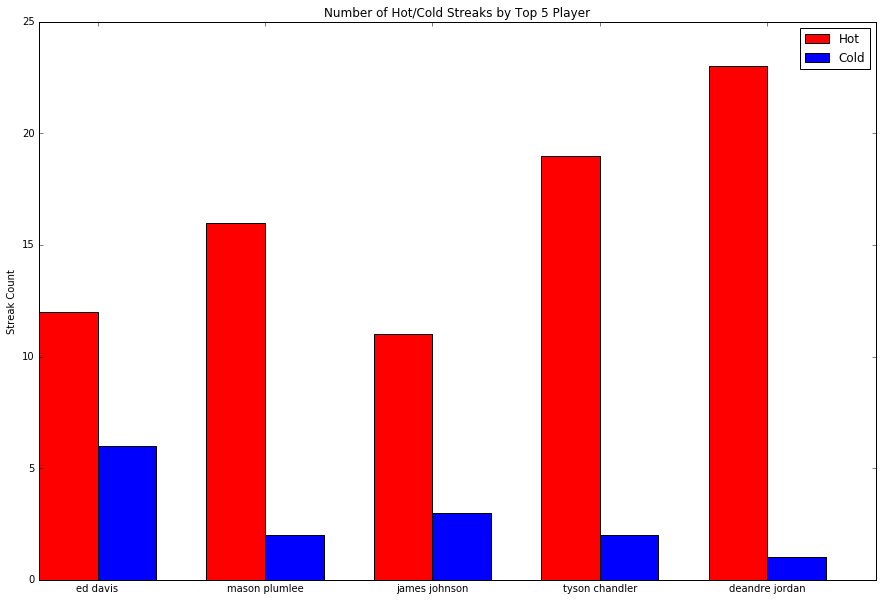

In [16]:
# let's look to see how many hot and cold streaks our top 5 players get on (defining a streak as >= 4 shots made/missed in a row as defined in lit review)
hot_streaks = []
cold_streaks = []
player_names = []
for player in top_5_players:
    player_df = top_5_df[top_5_df['player_id'] == player]
    player_names.append(player_df['player_name'].unique()[0])
    # count number of streaks (only count for == 4 or == -4, because if we do >=, we'll be double counting streaks (i.e. a streak of 5 is the same streak as one of 4 before it))
    hot_streak_count = player_df[player_df['current_streak'] == 4].shape[0]
    cold_streak_count = player_df[player_df['current_streak'] == -4].shape[0]
    hot_streaks.append(hot_streak_count)
    cold_streaks.append(cold_streak_count)

# plot a bar graph of number of streaks
ind = np.arange(5)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
rects1 = ax.bar(ind, hot_streaks, width, color='r')
rects2 = ax.bar(ind + width, cold_streaks, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('Streak Count')
ax.set_title('Number of Hot/Cold Streaks by Top 5 Player')
ax.set_xticks(ind + width)
ax.set_xticklabels(player_names)

ax.legend((rects1[0], rects2[0]), ('Hot', 'Cold'))


**Comment:** This bar graph shows us how many hot and cold streaks each of our top 5 players have for the entire season. It can help us identify some streaky shooters if we want to apply this plot to our entire player dataset. For instance, in the future we might want to calculate the players who have the largest difference between number of hot vs. cold streaks to see which players typically get hot. Those players could be useful to study in further analysis.

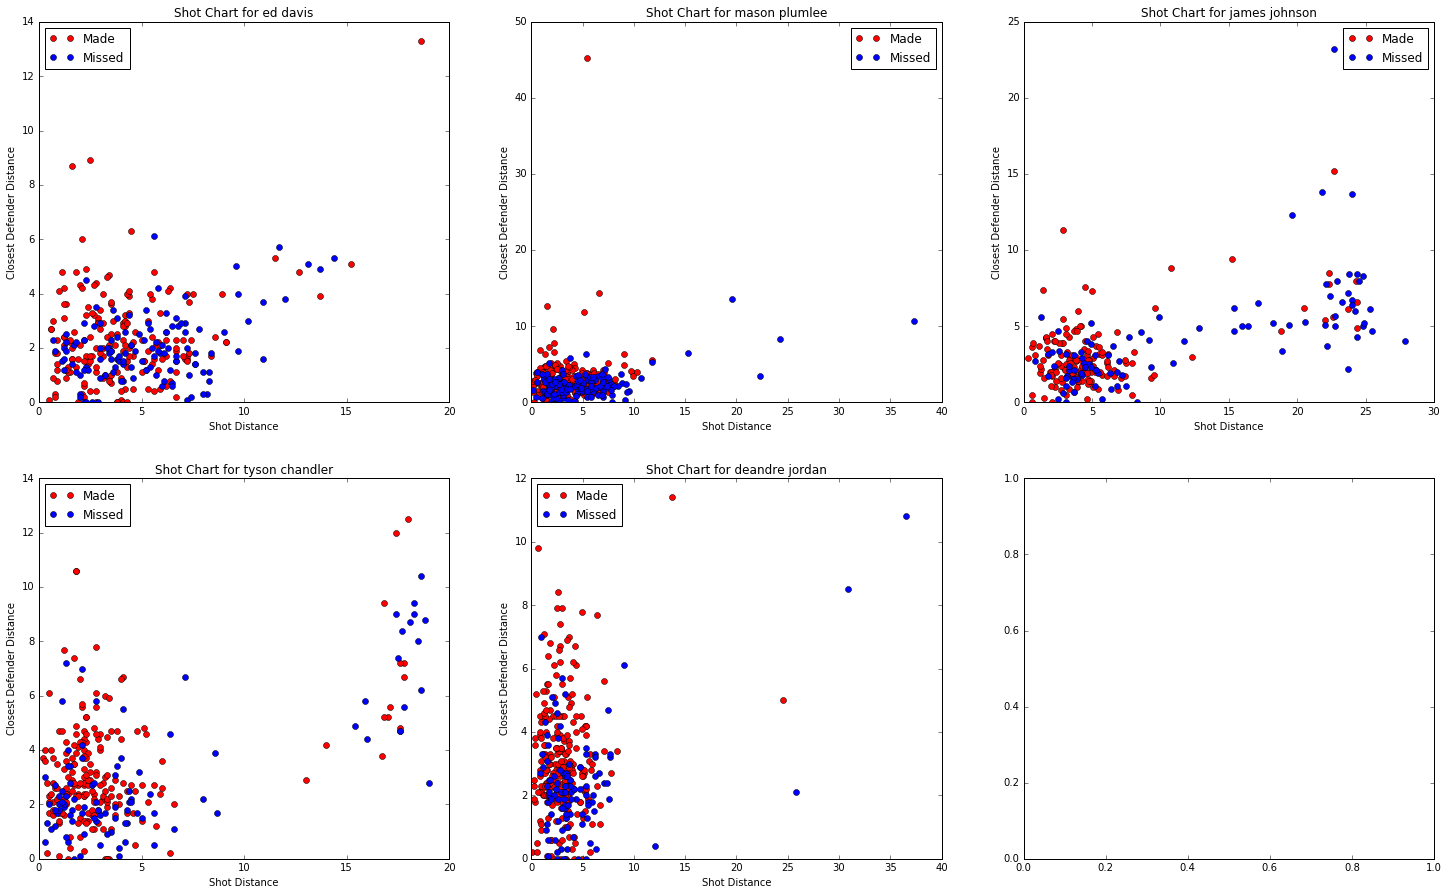

In [26]:
# let's now plot a scatter comparing shot distance to closest defender distance for each of our top 5 players to see if 
# we see any possible correlation between distances and whether or not the shot was made
fig, ax = plt.subplots(2, 3, figsize = (25, 15))
#Create index for subplots
ind = 0

for player in top_5_players:
    player_df = top_5_df[top_5_df['player_id'] == player]
    player_name = player_df['player_name'].unique()[0]
    # make a df for just the made shots and one for just the missed
    made_df = player_df[player_df['fgm'] == 1]
    missed_df = player_df[player_df['fgm'] == 0]
    
    # extract shot distances
    made_shot_distances = made_df['shot_dist']
    missed_shot_distances = missed_df['shot_dist']
    
    # extract defender distances
    made_def_distances = made_df['close_def_dist']
    missed_def_distances = missed_df['close_def_dist']
    
    # plot with a scatter plot
    ax[ind / 3, ind % 3].plot(made_shot_distances, made_def_distances, 'o', c='red', label='Made')
    ax[ind / 3, ind % 3].plot(missed_shot_distances, missed_def_distances, 'o', c='blue', label='Missed')
    ax[ind / 3, ind % 3].set_title('Shot Chart for ' + player_name)
    ax[ind / 3, ind % 3].set_xlabel('Shot Distance')
    ax[ind / 3, ind % 3].set_ylabel('Closest Defender Distance')
    ax[ind / 3, ind % 3].legend(loc='best')
    
    #Update index
    ind += 1

**Comment:** These charts give us a sense of whether or not a shot make or miss depends on the shot distance or the closest defender distance. Since the idea is that players who believe they are hot will take longer shots or will be guarded mose closely, this chart can give us a sense of if the data supports this theory.

In [65]:
shot_logs_reduced.to_csv('datasets/Augmented_Dataset.csv')